<a href="https://colab.research.google.com/github/jubatistim/GoogleColabsGeneral/blob/master/ML_20200508_random_forest_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification

Data: https://drive.google.com/file/d/1CgAmcBjRpHOfmhyIExM4gQ4XHflu_ZhY/view?usp=sharing

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [4]:
print(X_train[1:10,:])

[[    40  61000]
 [    52 114000]
 [    30  17000]
 [    42  80000]
 [    47  43000]
 [    40  78000]
 [    35  65000]
 [    26  35000]
 [    39  73000]]


In [5]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1
 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0
 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0]


In [6]:
print(X_test[1:10,:])

[[   47 30000]
 [   35 38000]
 [   54 70000]
 [   38 50000]
 [   42 65000]
 [   34 43000]
 [   26 80000]
 [   42 53000]
 [   29 80000]]


In [7]:
print(y_test)

[1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0]


## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train[1:10,:])

[[ 0.21319749 -0.30646745]
 [ 1.33528951  1.21013151]
 [-0.7218792  -1.56553074]
 [ 0.40021282  0.23721897]
 [ 0.86775117 -0.8215388 ]
 [ 0.21319749  0.17998882]
 [-0.25434086 -0.19200715]
 [-1.09590988 -1.05045939]
 [ 0.11968982  0.03691345]]


In [10]:
print(X_test[1:10,:])

[[ 0.86775117 -1.19353477]
 [-0.25434086 -0.96461417]
 [ 1.52230485 -0.04893178]
 [ 0.02618215 -0.62123327]
 [ 0.40021282 -0.19200715]
 [-0.34784853 -0.8215388 ]
 [-1.09590988  0.23721897]
 [ 0.40021282 -0.53538805]
 [-0.81538687  0.23721897]]


## Training the Random Forest Classification model on the Training set

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predicting a new result

In [12]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[1:15,:])

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[66  3]
 [ 5 26]]


0.92

## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


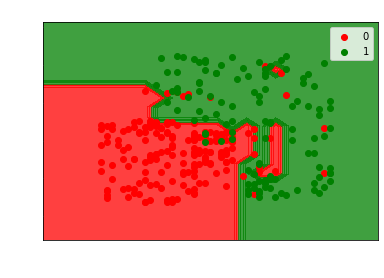

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)', fontdict={'color':'white'})
plt.xlabel('Age', fontdict={'color':'white'})
plt.ylabel('Estimated Salary', fontdict={'color':'white'})
plt.legend()
plt.tick_params(colors='w')
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


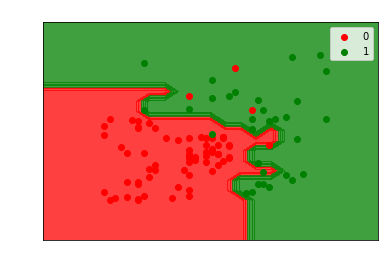

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)', fontdict={'color':'white'})
plt.xlabel('Age', fontdict={'color':'white'})
plt.ylabel('Estimated Salary', fontdict={'color':'white'})
plt.legend()
plt.tick_params(colors='w')
plt.show()